In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',30)
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel("D:\\GL\\interview_prep\\Home.LLC\\New folder\\homellcdata.xlsx") # Loading data from excel file.

In [3]:
df.head()

,DATE,HOUSE_TAX,GDP,RECESSION,MORTGAGE_RATE,PERMIT,POPULATION_GROWTH,LIFE_EXPECTANCY,OLD_AGE_DEPENDENCY_RATIO,TTLCONS,CPI,UNEMPLOYMENT_RATE,HOME_PRICE_INDEX
0,2002-01-01,626,10929.10825,0,6.54,1749,287955,76.936585,18.457228,848340,180.3,5.8,122.279167
1,2003-01-01,611,11456.44950,0,5.83,1888,290626,77.036585,18.399514,890521,184.8,6.0,133.731333
2,2004-01-01,595,12217.19575,0,5.84,2058,293262,77.487805,18.398280,989220,189.5,5.5,150.440250
3,2005-01-01,667,13039.19700,0,5.87,2160,295993,77.487805,18.440046,1114935,195.7,5.1,171.737000
4,2006-01-01,649,13815.58300,0,6.41,1844,298818,77.687805,18.496666,1164343,203.2,4.6,183.447500


In [4]:
df.shape # Checking the shape of the data.

(21, 13)

In [5]:
df.duplicated().sum()     # Checking for duplicate values.

0

In [6]:
df.isnull().sum()             # Checking for missing values.

DATE                        0
HOUSE_TAX                   0
GDP                         0
RECESSION                   0
MORTGAGE_RATE               0
PERMIT                      0
POPULATION_GROWTH           0
LIFE_EXPECTANCY             0
OLD_AGE_DEPENDENCY_RATIO    0
TTLCONS                     0
CPI                         0
UNEMPLOYMENT_RATE           0
HOME_PRICE_INDEX            0
dtype: int64

In [7]:
df.info()                 # Checking Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      21 non-null     datetime64[ns]
 1   HOUSE_TAX                 21 non-null     int64         
 2   GDP                       21 non-null     float64       
 3   RECESSION                 21 non-null     int64         
 4   MORTGAGE_RATE             21 non-null     float64       
 5   PERMIT                    21 non-null     int64         
 6   POPULATION_GROWTH         21 non-null     int64         
 7   LIFE_EXPECTANCY           21 non-null     float64       
 8   OLD_AGE_DEPENDENCY_RATIO  21 non-null     float64       
 9   TTLCONS                   21 non-null     int64         
 10  CPI                       21 non-null     float64       
 11  UNEMPLOYMENT_RATE         21 non-null     float64       
 12  HOME_PRICE_INDEX        

In [8]:
df['RECESSION'] = df['RECESSION'].astype('object')       # Type conversion of the Recession feature.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      21 non-null     datetime64[ns]
 1   HOUSE_TAX                 21 non-null     int64         
 2   GDP                       21 non-null     float64       
 3   RECESSION                 21 non-null     object        
 4   MORTGAGE_RATE             21 non-null     float64       
 5   PERMIT                    21 non-null     int64         
 6   POPULATION_GROWTH         21 non-null     int64         
 7   LIFE_EXPECTANCY           21 non-null     float64       
 8   OLD_AGE_DEPENDENCY_RATIO  21 non-null     float64       
 9   TTLCONS                   21 non-null     int64         
 10  CPI                       21 non-null     float64       
 11  UNEMPLOYMENT_RATE         21 non-null     float64       
 12  HOME_PRICE_INDEX        

### Separating Numerical and categorical Features:

In [10]:
df_cat = df.select_dtypes(object)                      
df_cat.columns

Index(['RECESSION'], dtype='object')

In [11]:
df_num = df.select_dtypes(np.number)
df_num.columns

Index(['HOUSE_TAX', 'GDP', 'MORTGAGE_RATE', 'PERMIT', 'POPULATION_GROWTH',
       'LIFE_EXPECTANCY', 'OLD_AGE_DEPENDENCY_RATIO', 'TTLCONS', 'CPI',
       'UNEMPLOYMENT_RATE', 'HOME_PRICE_INDEX'],
      dtype='object')

In [12]:
df_num.describe().T           # Statistical Analysis of numerical features.

,count,mean,std,min,25%,50%,75%,max
HOUSE_TAX,21.0,1.661667e+03,1135.804047,582.000000,638.000000,6.910000e+02,2.631000e+03,3.423000e+03
GDP,21.0,1.695820e+04,4030.349300,10929.108250,14474.227000,1.625397e+04,1.961210e+04,2.574411e+04
MORTGAGE_RATE,21.0,4.772857e+00,1.130461,2.960000,3.940000,4.540000e+00,5.840000e+00,6.540000e+00
PERMIT,21.0,1.330333e+03,476.438384,582.000000,988.000000,1.328000e+03,1.740000e+03,2.160000e+03
POPULATION_GROWTH,21.0,3.135388e+05,14875.621738,287955.000000,301696.000000,3.147250e+05,3.268600e+05,3.335950e+05
LIFE_EXPECTANCY,21.0,7.797470e+01,0.830724,76.329268,77.487805,7.839024e+01,7.864146e+01,7.884146e+01
OLD_AGE_DEPENDENCY_RATIO,21.0,2.102772e+01,2.619576,18.398280,18.605332,2.034411e+01,2.287006e+01,2.638650e+01
TTLCONS,21.0,1.136997e+06,285187.671641,790568.000000,912243.000000,1.114935e+06,1.280870e+06,1.847810e+06
CPI,21.0,2.298143e+02,32.663011,180.300000,209.600000,2.227000e+02,2.512000e+02,3.008000e+02
UNEMPLOYMENT_RATE,21.0,6.009524e+00,1.846863,3.600000,4.600000,5.500000e+00,7.400000e+00,9.600000e+00


In [13]:
df_cat.describe()              # Statistical Analysis of categorial feature.

,RECESSION
count,21
unique,2
top,0
freq,17


In [14]:
df_cat.value_counts(normalize=True) 

RECESSION
0            0.809524
1            0.190476
dtype: float64

### Univariate Analysis

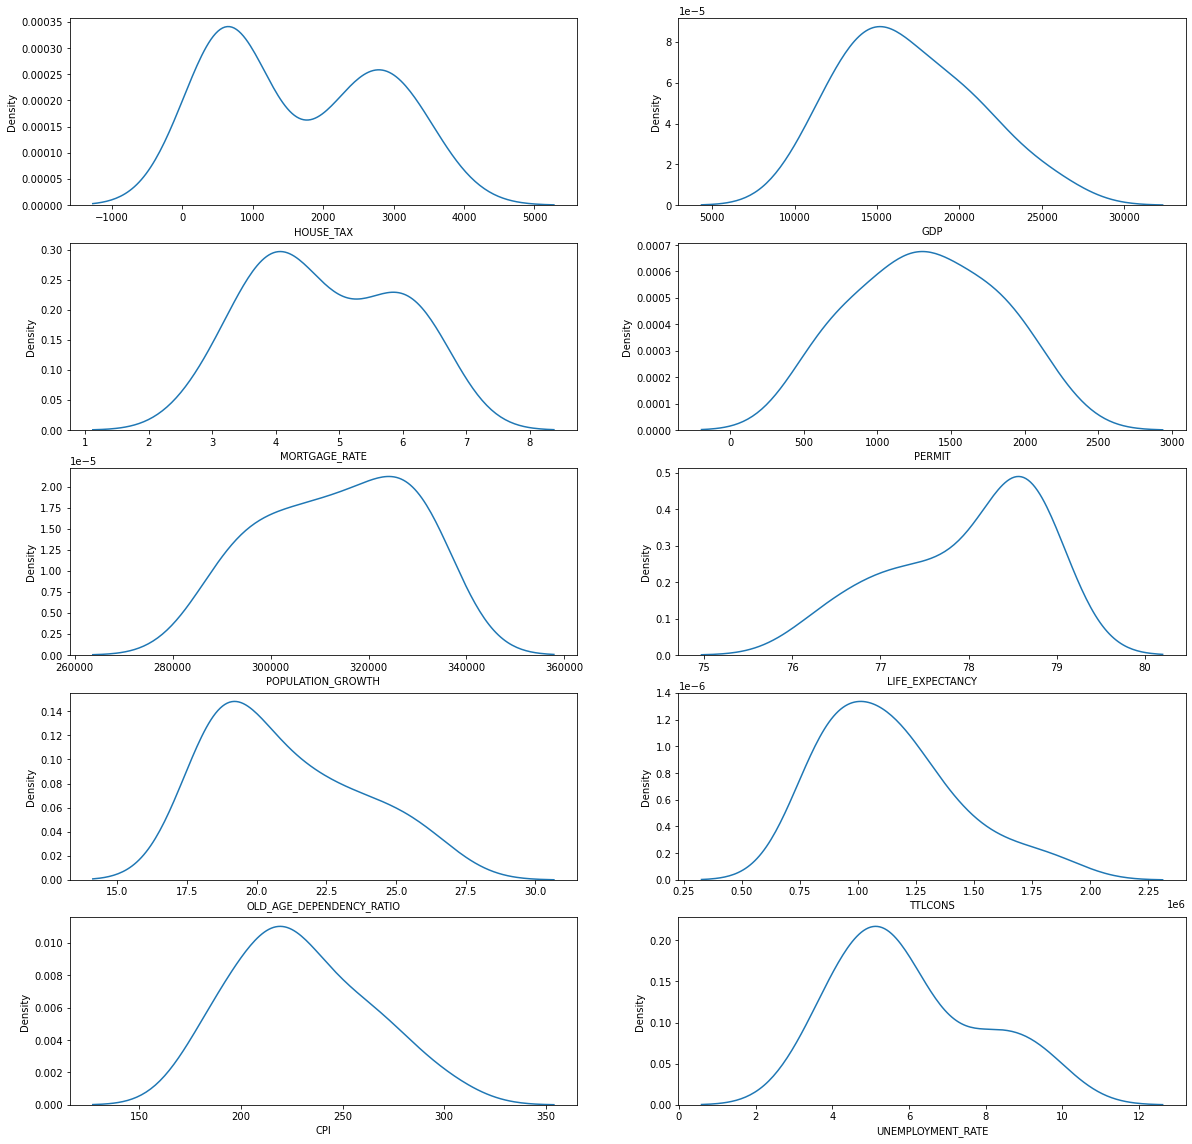

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
for var, subplot in zip(df_num.columns[:], ax.flatten()):
    sns.kdeplot(df_num[var], ax= subplot)
plt.show()                                 # Checking the distribution of the numerical features.

<AxesSubplot:xlabel='RECESSION', ylabel='count'>

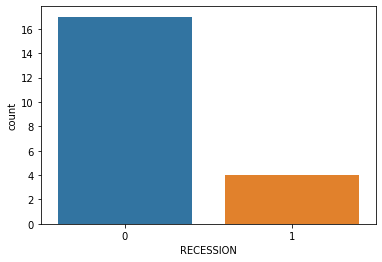

In [16]:
sns.countplot(df_cat['RECESSION'])

In [17]:
df1 = df.copy()

### Bivariate Analysis

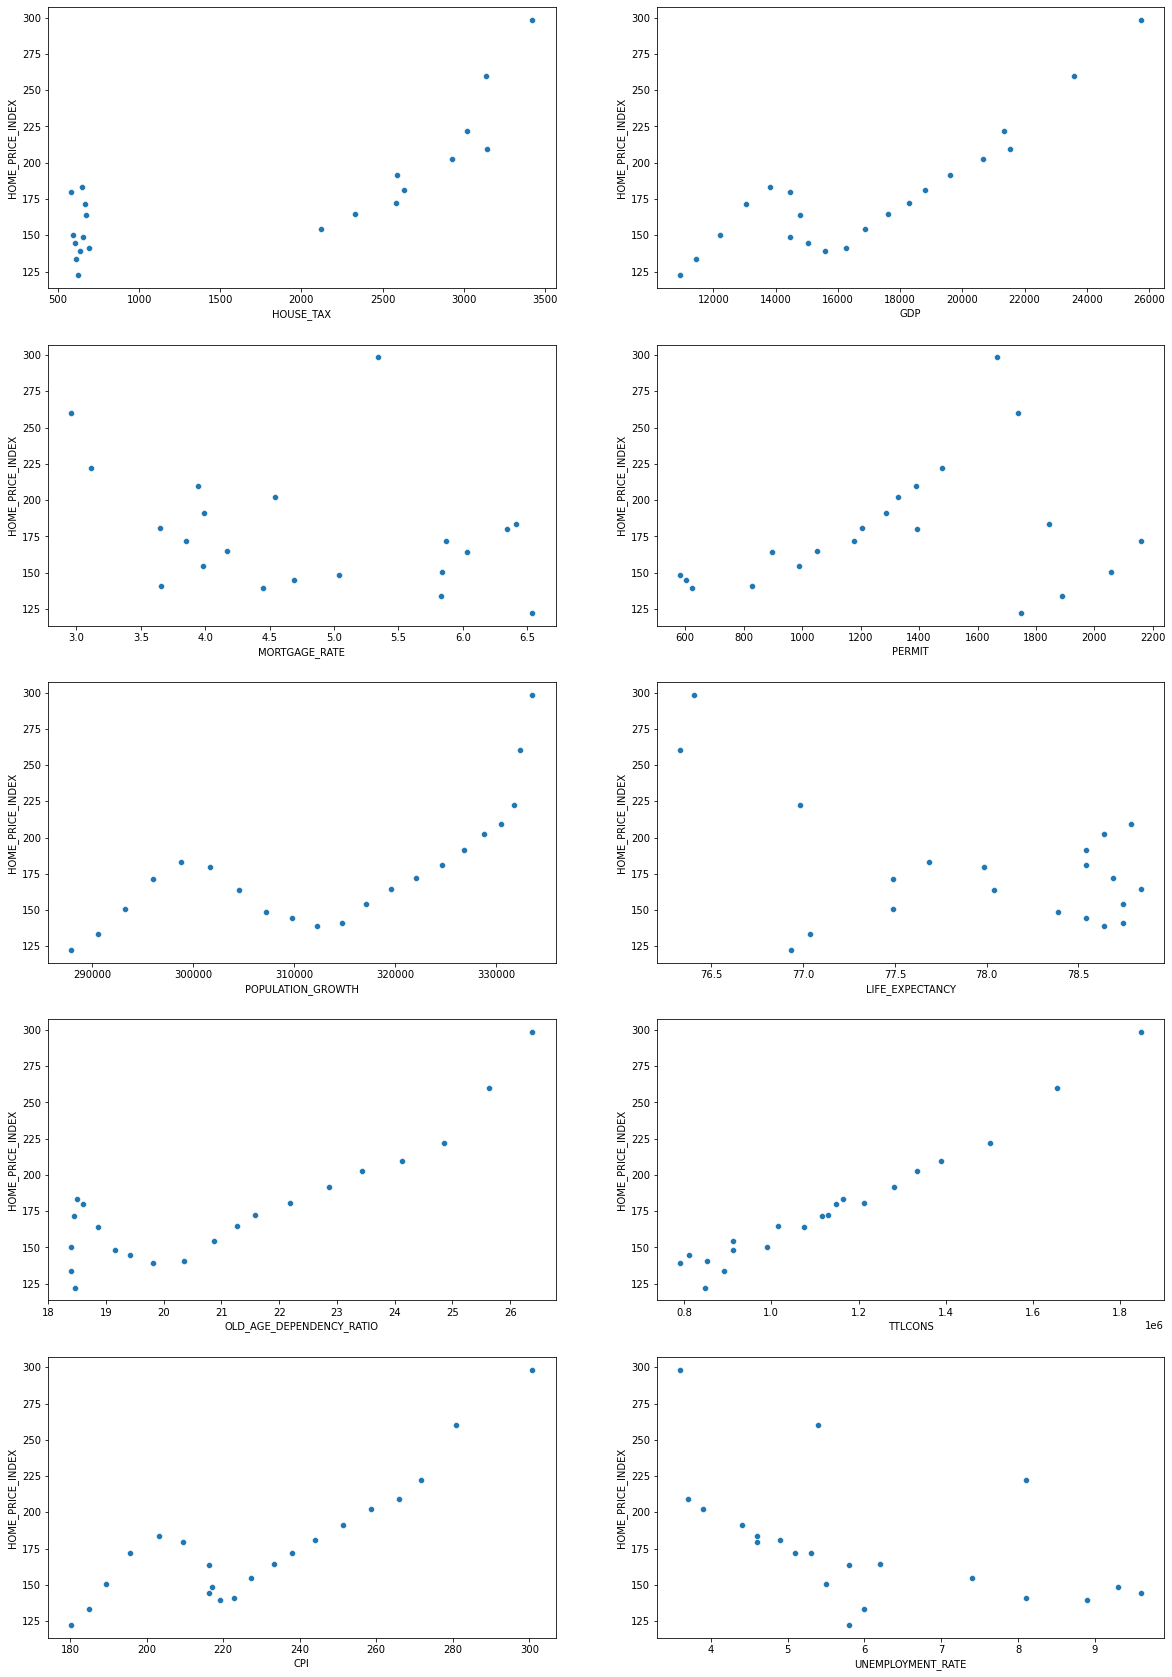

In [18]:
fig , ax  = plt.subplots(nrows = 5, ncols=2, figsize=(20,30))
for var, subplot in zip(df_num.columns[:-1], ax.flatten()):
    sns.scatterplot(df[var], df['HOME_PRICE_INDEX'], ax = subplot)
plt.show()                          # Checking the relationship between independent and dependent variables.

In [19]:
# 1. There is a nonlinear relationship between GDP and Home price index. Inintially there was up and down , then there was a
# steady increase of home price index with the increase of GDP.
# 2. Same non linear relaationship can be seen between population growth and home price index.
# 3. There is no relationship between old age dependency ratio and home price index as long as the old age percentage is 
# around 18%, however as old age dependency on the working population percentage increases the home price index also increases.
# 4. There is a linear relationship between total constuction spending and the home price index. 

In [20]:
pd.pivot_table(data = df, index = 'RECESSION', values='HOUSE_TAX', aggfunc=np.mean)

,HOUSE_TAX
RECESSION,
0,1762.647059
1,1232.500000


In [21]:
# As can be seen from the above table that during recession years government decreased house tax significantly in order
# to increase disposable income of the people and pump that money into the economy to recover from recession.

In [22]:
pd.pivot_table(data = df, index = 'RECESSION', values='UNEMPLOYMENT_RATE', aggfunc=np.mean)

,UNEMPLOYMENT_RATE
RECESSION,
0,5.788235
1,6.950000


In [23]:
# As can be seen from the table that unemployment rate increases with recession.

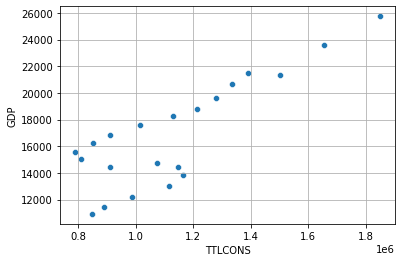

In [24]:
sns.scatterplot(df['TTLCONS'], df['GDP'])
plt.grid()

In [25]:
df.set_index(keys ='DATE', drop = True, inplace = True)

In [26]:
df.head()

,HOUSE_TAX,GDP,RECESSION,MORTGAGE_RATE,PERMIT,POPULATION_GROWTH,LIFE_EXPECTANCY,OLD_AGE_DEPENDENCY_RATIO,TTLCONS,CPI,UNEMPLOYMENT_RATE,HOME_PRICE_INDEX
DATE,,,,,,,,,,,,
2002-01-01,626,10929.10825,0,6.54,1749,287955,76.936585,18.457228,848340,180.3,5.8,122.279167
2003-01-01,611,11456.44950,0,5.83,1888,290626,77.036585,18.399514,890521,184.8,6.0,133.731333
2004-01-01,595,12217.19575,0,5.84,2058,293262,77.487805,18.398280,989220,189.5,5.5,150.440250
2005-01-01,667,13039.19700,0,5.87,2160,295993,77.487805,18.440046,1114935,195.7,5.1,171.737000
2006-01-01,649,13815.58300,0,6.41,1844,298818,77.687805,18.496666,1164343,203.2,4.6,183.447500


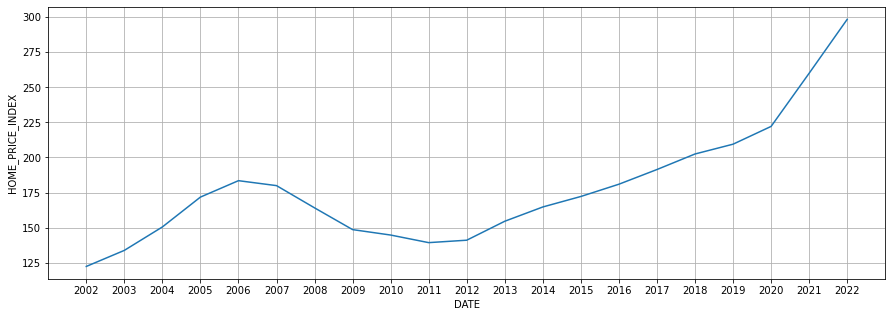

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['HOME_PRICE_INDEX'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [28]:
# Before 2012 there was ups and downs in the home price index but from 2012 onwards there was an exponential increase
# of home price index.

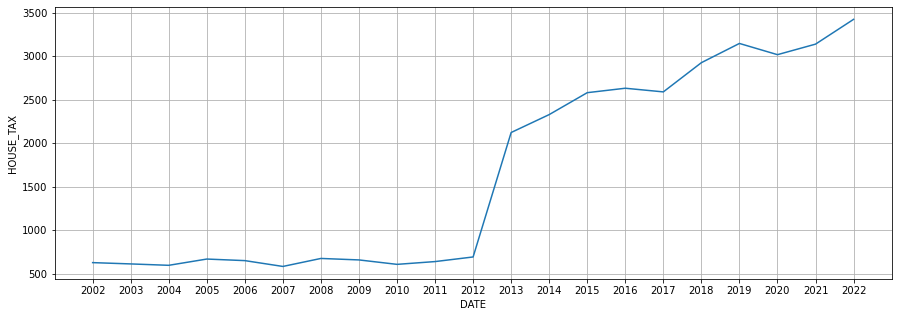

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['HOUSE_TAX'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [30]:
# As can be seen from the above plot that that till 2011, house tax was very low, infact tax was hovering with in 
# the span of 600 and 700 but in 2012 there was a drastic increase in the house tax, which can also be one of the reason 
# for exponential house price index increase. 

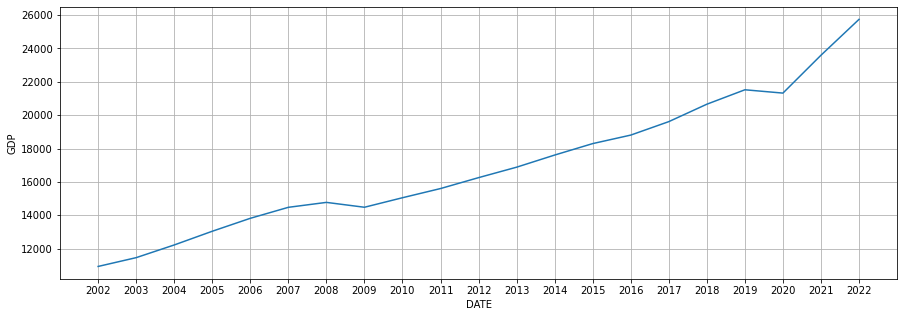

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['GDP'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [32]:
# As can be seen from the plot that there is a decline in GDP during the year 2008-2009 and 2019-2020 (durimg covid).

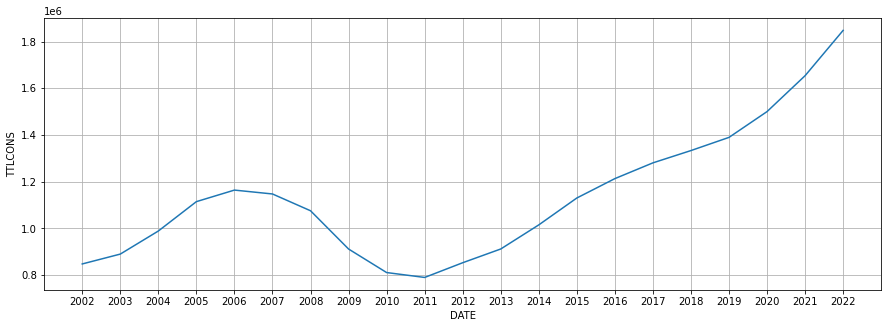

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['TTLCONS'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [34]:
# the above plot evident of the market crash in USA in 2008 and recession during the period of 2008-2011 which  
# impacted realstate sector.

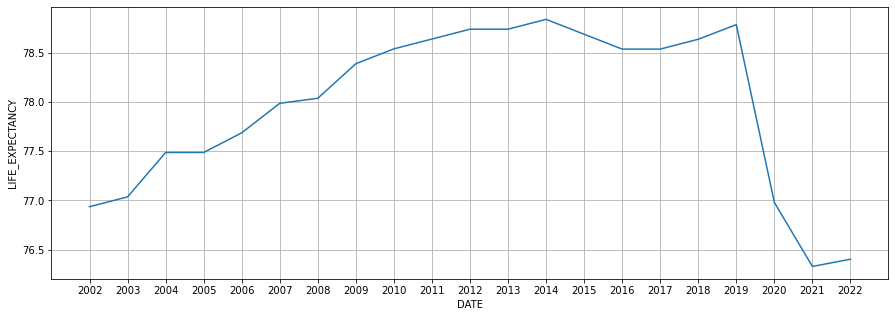

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['LIFE_EXPECTANCY'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [36]:
# The above plot displays a significant fall of life expectancy from the year 2019 due to covid waves.

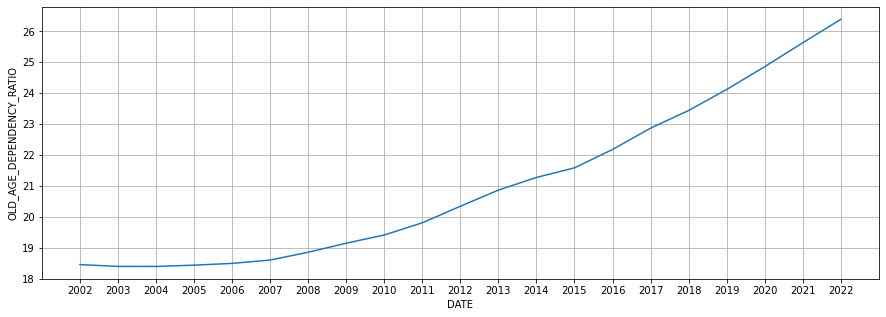

In [37]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['OLD_AGE_DEPENDENCY_RATIO'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [38]:
# The above plot clearly indicates that there is increase in old age population dependency percentage over the years.

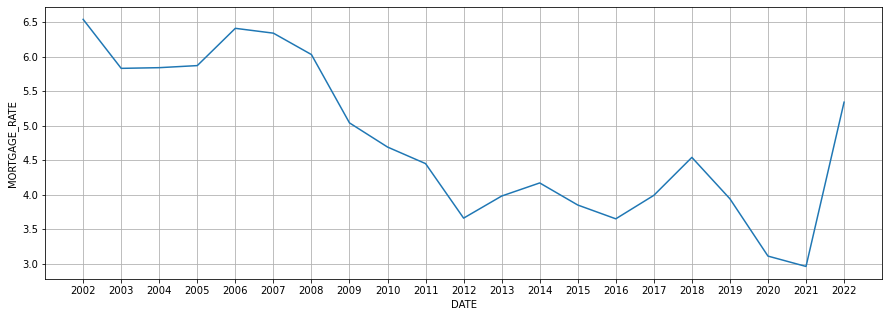

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['MORTGAGE_RATE'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [40]:
# The mortgage rate dropped significantly after 2008 US market crash, after which there were some steady ups and downs 
# in the market rate, it came to its minimum point during covid period, as economies were completely in shutdown stage. 
# However after lockdown period during the revival period of the econoimies, mortgage rate increases significantly.

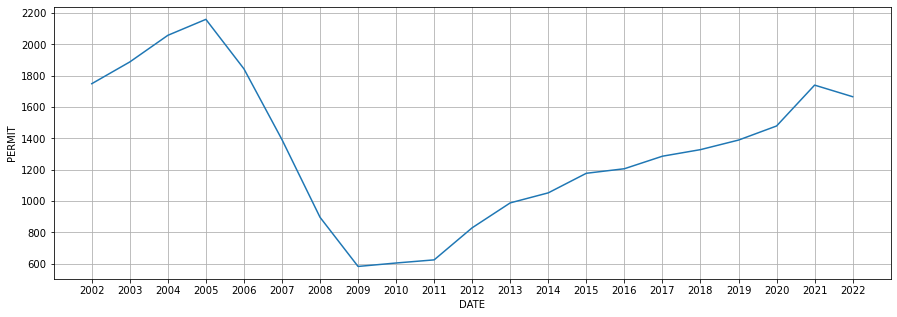

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['PERMIT'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

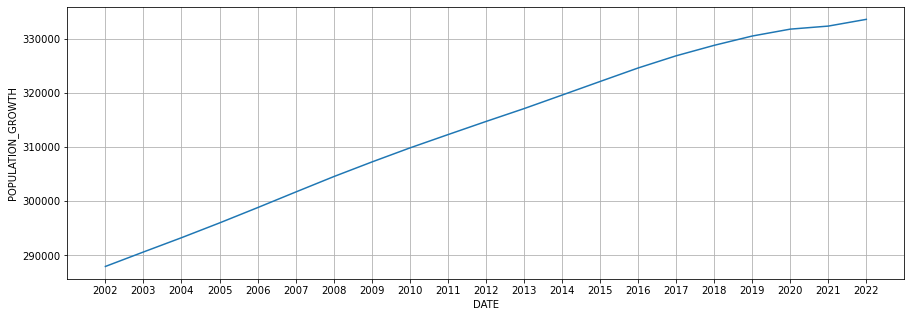

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['POPULATION_GROWTH'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [43]:
# Population growth followed a steady increase in last 20 years.

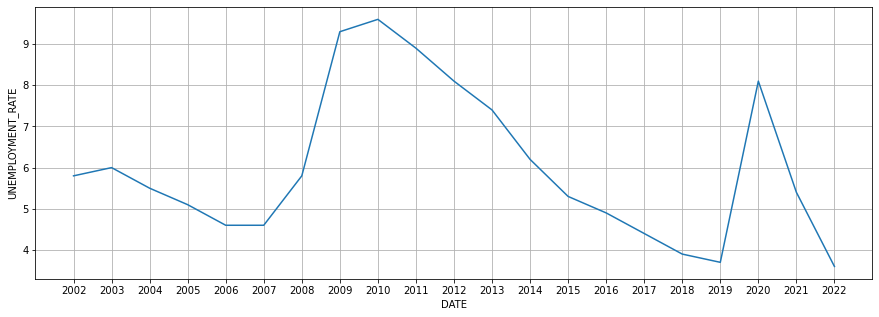

In [44]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['UNEMPLOYMENT_RATE'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [45]:
#  Unemployment rate was very high during the economic recession, many people lost their job at that time, then there was a 
#  steady decrease in the unemployment rate till 2019, then there was a massive job loss during covid period.

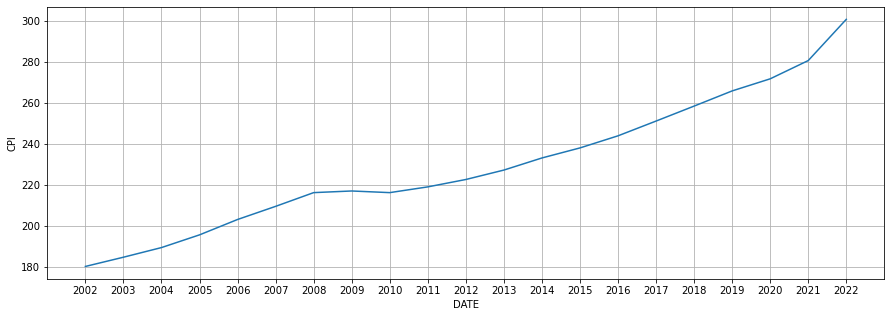

In [127]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index.year, df['CPI'])
plt.xticks(ticks=df.index.year)
plt.grid()
plt.show()

In [128]:
# The above plot shows the distribution of CPI over the years. From 2008 to 2010 due to recession there was no increase in CPI.
# from 2021 there is a sharp incrase in CPI, indicating high inflation in the US economy.

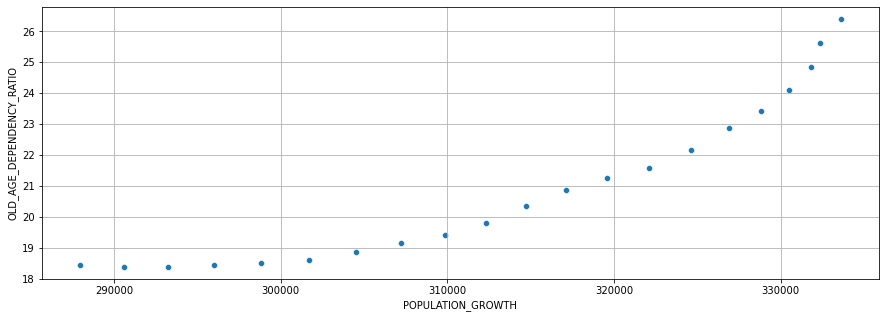

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['POPULATION_GROWTH'], df['OLD_AGE_DEPENDENCY_RATIO'])
plt.grid()

In [47]:
# The old age population dependency percentage increases with the increase in population growth.

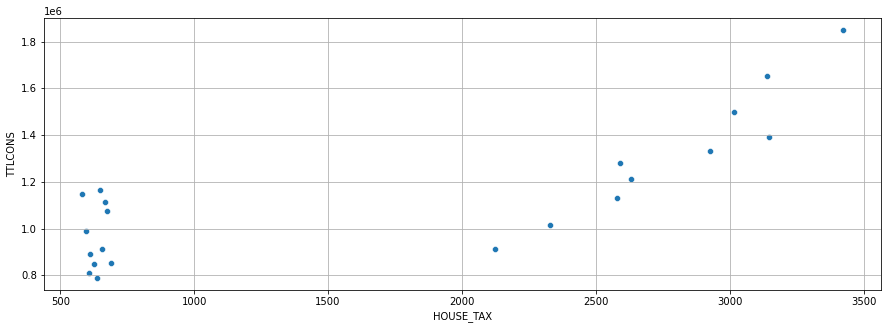

In [48]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['HOUSE_TAX'], df['TTLCONS'])
plt.grid()

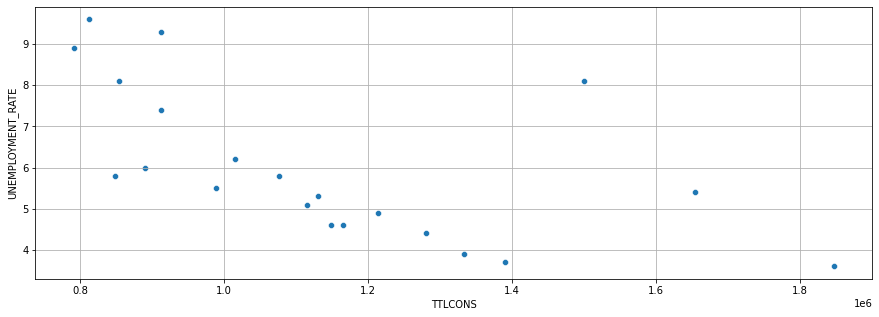

In [49]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['TTLCONS'], df['UNEMPLOYMENT_RATE'])
plt.grid()

In [50]:
# There may be an indication that, If the Spending increases, employers will hire more and more employees and unemployment 
# percentage will fall.

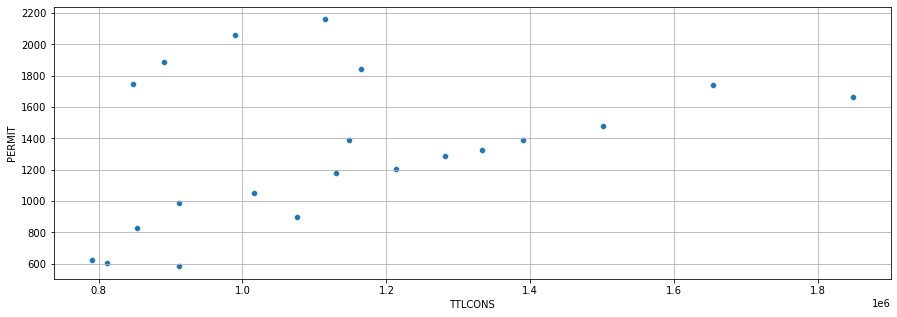

In [51]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['TTLCONS'], df['PERMIT'])
plt.grid()
plt.show()

In [52]:
# No significant relationship between total construction spending and Permit.

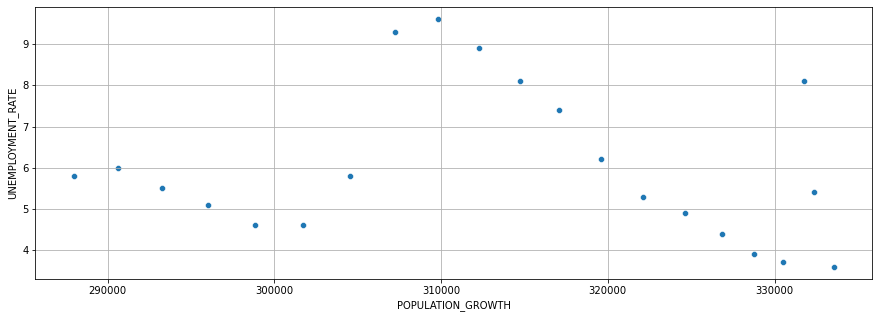

In [53]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['POPULATION_GROWTH'], df['UNEMPLOYMENT_RATE'])
plt.grid()
plt.show()

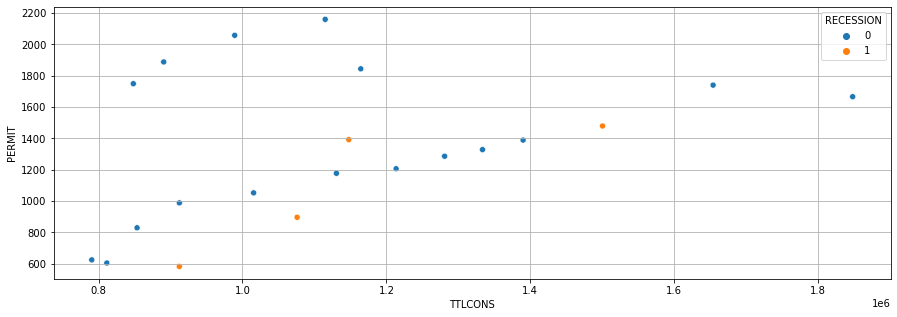

In [54]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['TTLCONS'], df['PERMIT'], hue =df['RECESSION'])
plt.grid()
plt.show()

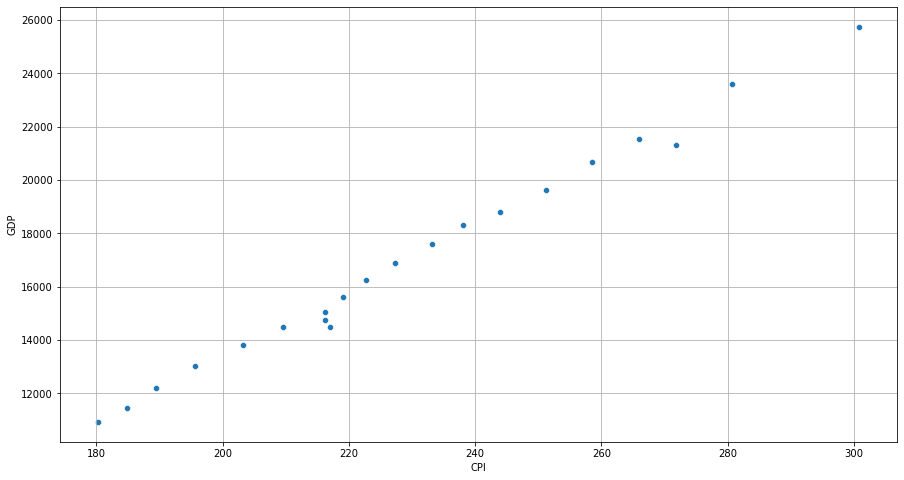

In [134]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['CPI'], df['GDP'])
plt.grid()
plt.show()

In [133]:
# The plot displays the relationship between CPI and GDP, as CPI increses GDP also increases.

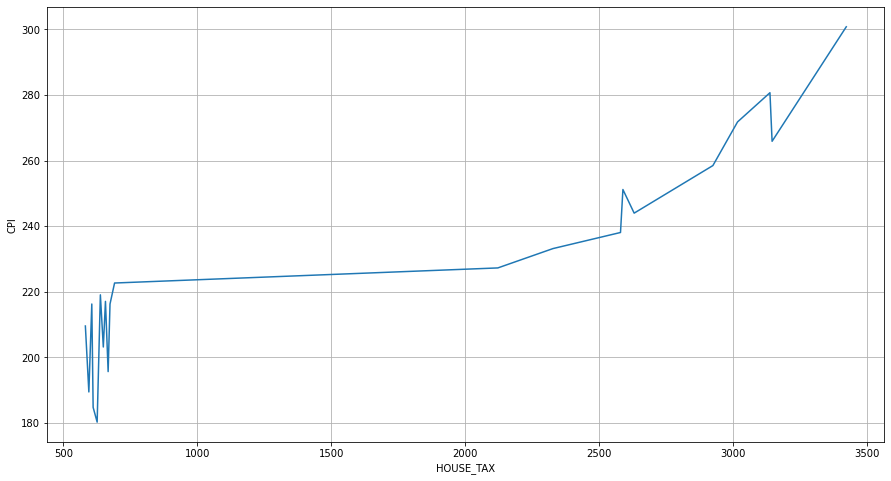

In [137]:
plt.figure(figsize=(15,8))
sns.lineplot(df['HOUSE_TAX'], df['CPI'])
plt.grid()
plt.show()

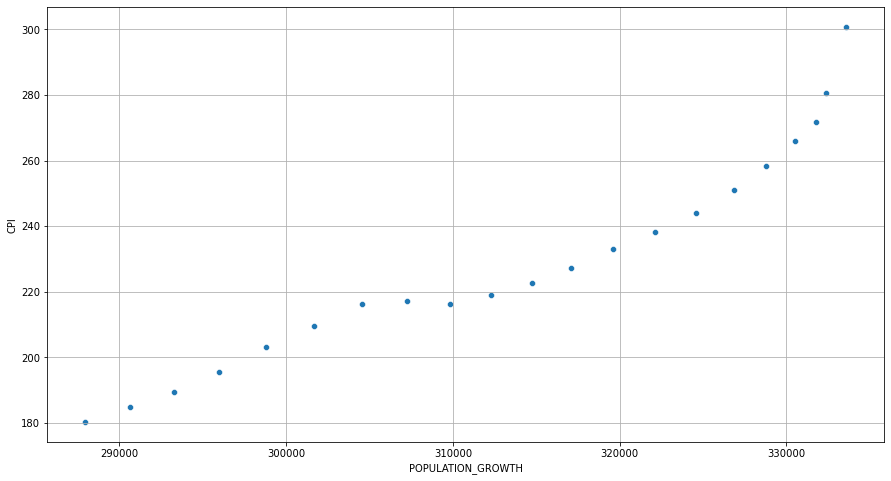

In [140]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['POPULATION_GROWTH'], df['CPI'])
plt.grid()
plt.show()

In [141]:
# As can be seen from the graph the population growth is one of the driving factor for the increase of CPI.

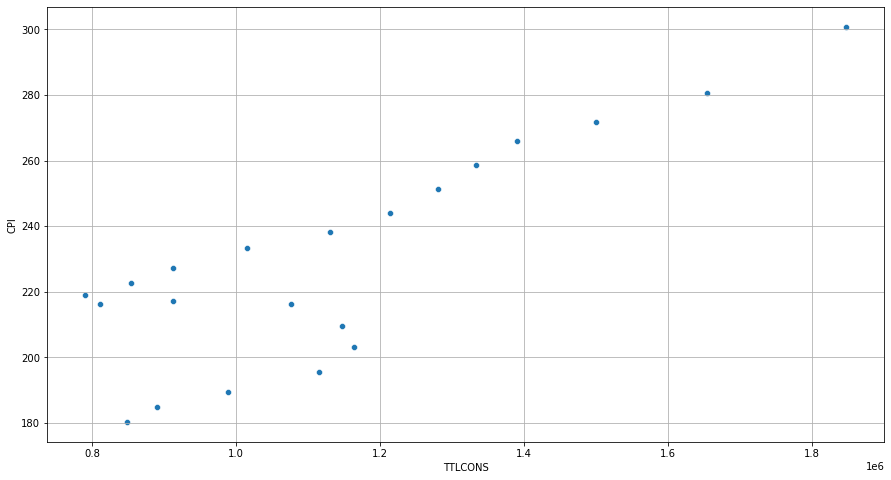

In [142]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['TTLCONS'], df['CPI'])
plt.grid()
plt.show()

In [129]:
df.columns

Index(['HOUSE_TAX', 'GDP', 'RECESSION', 'MORTGAGE_RATE', 'PERMIT',
       'POPULATION_GROWTH', 'LIFE_EXPECTANCY', 'OLD_AGE_DEPENDENCY_RATIO',
       'TTLCONS', 'CPI', 'UNEMPLOYMENT_RATE', 'HOME_PRICE_INDEX'],
      dtype='object')

### Correlation Check:

<AxesSubplot:>

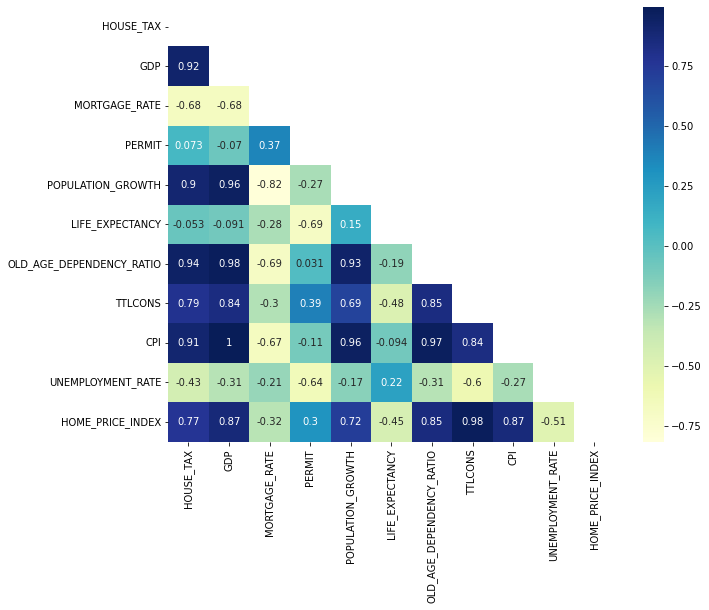

In [56]:
mask = np.triu(np.ones_like(df_num.corr()))
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot = True, mask=mask, cmap="YlGnBu")

In [57]:
# As evident from the heatmap that there are few highly correlated independent features which may lead to high multicollinearity.


In [58]:
features = df_num.drop('HOME_PRICE_INDEX', axis = 1)
features.columns

Index(['HOUSE_TAX', 'GDP', 'MORTGAGE_RATE', 'PERMIT', 'POPULATION_GROWTH',
       'LIFE_EXPECTANCY', 'OLD_AGE_DEPENDENCY_RATIO', 'TTLCONS', 'CPI',
       'UNEMPLOYMENT_RATE'],
      dtype='object')

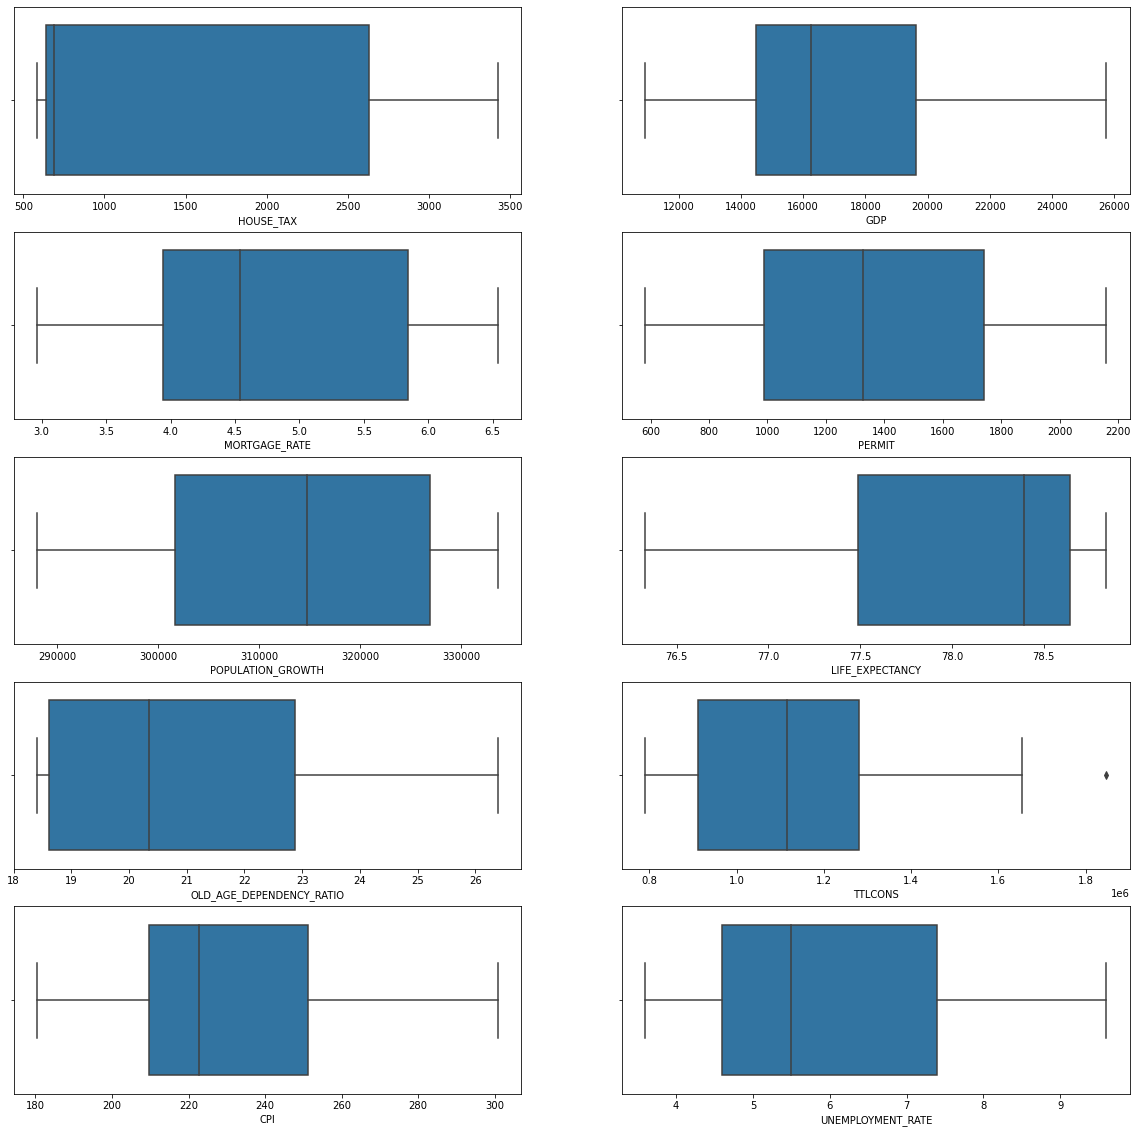

In [59]:
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(20,20))
for var, subplot in zip(features.columns[:], ax.flatten()):
    sns.boxplot(features[var], ax = subplot)
plt.show()
                                # Checking for outliers.

In [61]:
features.skew()

HOUSE_TAX                   0.280142
GDP                         0.500107
MORTGAGE_RATE               0.141660
PERMIT                      0.009790
POPULATION_GROWTH          -0.243937
LIFE_EXPECTANCY            -0.757697
OLD_AGE_DEPENDENCY_RATIO    0.721816
TTLCONS                     0.968776
CPI                         0.465882
UNEMPLOYMENT_RATE           0.690504
dtype: float64

In [62]:
ss = StandardScaler()                                # Data Scaling using standard scaler.

for i in features.columns:
    features[i] = ss.fit_transform(features[i].values.reshape(-1,1))

In [63]:
features.head()

,HOUSE_TAX,GDP,MORTGAGE_RATE,PERMIT,POPULATION_GROWTH,LIFE_EXPECTANCY,OLD_AGE_DEPENDENCY_RATIO,TTLCONS,CPI,UNEMPLOYMENT_RATE
0,-0.934354,-1.532865,1.601809,0.900443,-1.762317,-1.280512,-1.005497,-1.037160,-1.553349,-0.116250
1,-0.947886,-1.398791,0.958237,1.199396,-1.578327,-1.157162,-1.028073,-0.885602,-1.412176,-0.005284
2,-0.962321,-1.205376,0.967301,1.565022,-1.396748,-0.600585,-1.028556,-0.530971,-1.264729,-0.282699
3,-0.897364,-0.996386,0.994494,1.784397,-1.208626,-0.600585,-1.012218,-0.079270,-1.070224,-0.504631
4,-0.913603,-0.798994,1.483972,1.104763,-1.014028,-0.353885,-0.990070,0.098256,-0.834936,-0.782046


In [64]:
df_cat.value_counts()

RECESSION
0            17
1             4
dtype: int64

In [65]:
df_dummy = pd.get_dummies(df_cat, drop_first= True)               # Dummy variable encoding for the categorial feature.

In [66]:
df_dummy.head()

,RECESSION_1
0,0
1,0
2,0
3,0
4,0


In [67]:
X = pd.concat([features, df_dummy], axis = 1)          

In [68]:
X.columns

Index(['HOUSE_TAX', 'GDP', 'MORTGAGE_RATE', 'PERMIT', 'POPULATION_GROWTH',
       'LIFE_EXPECTANCY', 'OLD_AGE_DEPENDENCY_RATIO', 'TTLCONS', 'CPI',
       'UNEMPLOYMENT_RATE', 'RECESSION_1'],
      dtype='object')

In [69]:
X.shape

(21, 11)

In [70]:
y = df_num['HOME_PRICE_INDEX']
y.shape

(21,)

### Train Test Split

In [71]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
print("Xtrain", Xtrain.shape)
print("Xtest", Xtest.shape)
print("ytrain", ytrain.shape)
print("ytest", ytest.shape)

Xtrain (16, 11)
Xtest (5, 11)
ytrain (16,)
ytest (5,)


In [73]:
Xctrain = sm.add_constant(Xtrain)
Xctest = sm.add_constant(Xtest)

### Model Selection

#### Linear Regression Full model 

In [74]:
ols_model_full = sm.OLS(ytrain, Xctrain).fit()
print(ols_model_full.summary())

                            OLS Regression Results                            
Dep. Variable:       HOME_PRICE_INDEX   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     559.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           7.52e-06
Time:                        02:10:57   Log-Likelihood:                -24.796
No. Observations:                  16   AIC:                             73.59
Df Residuals:                       4   BIC:                             82.86
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
# In the above model cond. no. is 279, which is a clear indication of the presence of multicollinearity.

In [76]:
ypred = ols_model_full.predict(Xctest)
mse = mean_squared_error(ytest, ypred)
mse

182.17957401388918

In [77]:
ols_model_full.rsquared

0.9993506289006174

In [78]:
ssr = np.sum((ytest - ypred) ** 2)
sst = np.sum((ytest - np.mean(ytest)) ** 2)
r_squared = 1 - (ssr / sst)
r_squared

0.7783155063123681

In [79]:
model_comp = pd.DataFrame(columns=['Name','R2','MAE','MSE','RMSE'])

In [80]:
def cal_eval_mat(model, ytest, r2, ypred):
    #  ypred = model.predict(Xctest)
    mse = mean_squared_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    rmse = mean_squared_error(ytest, ypred, squared=False)
    global model_comp
    model_comp = model_comp.append({'Name':str(model), 'R2': r2, 'MAE':mae, 'MSE':mse, 'RMSE': rmse}, ignore_index = True)
    

In [81]:
def getvif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values(by = 'vif_factor', ascending = False)

In [82]:
cal_eval_mat('ols_model_full', ytest,r_squared, ypred)

In [83]:
model_comp

,Name,R2,MAE,MSE,RMSE
0,ols_model_full,0.778316,10.329136,182.179574,13.497391


In [84]:
X_vif = Xtrain.copy()

In [85]:
X_vif.head()

,HOUSE_TAX,GDP,MORTGAGE_RATE,PERMIT,POPULATION_GROWTH,LIFE_EXPECTANCY,OLD_AGE_DEPENDENCY_RATIO,TTLCONS,CPI,UNEMPLOYMENT_RATE,RECESSION_1
14,0.874509,0.469517,-1.017803,-0.267409,0.762564,0.696091,0.450420,0.274715,0.445030,-0.615597,0
16,1.139749,0.940277,-0.211071,-0.005018,1.050914,0.819440,0.943404,0.706043,0.899920,-1.170427,0
4,-0.913603,-0.798994,1.483972,1.104763,-1.014028,-0.353885,-0.990070,0.098256,-0.834936,-0.782046,0
2,-0.962321,-1.205376,0.967301,1.565022,-1.396748,-0.600585,-1.028556,-0.530971,-1.264729,-0.282699,0
6,-0.891049,-0.556374,1.139525,-0.934138,-0.619666,0.079343,-0.849006,-0.219442,-0.423966,-0.116250,1


In [86]:
getvif(X_vif)

,features,vif_factor
4,POPULATION_GROWTH,4151.970353
8,CPI,3059.545359
1,GDP,2549.589785
6,OLD_AGE_DEPENDENCY_RATIO,772.992504
7,TTLCONS,526.761033
5,LIFE_EXPECTANCY,234.702994
3,PERMIT,170.528391
2,MORTGAGE_RATE,137.891195
0,HOUSE_TAX,41.859372
9,UNEMPLOYMENT_RATE,36.340578


In [87]:
X_vif = X_vif.drop('POPULATION_GROWTH', axis = 1)

#### Linear Regression after implementing VIF

In [88]:
Xc_vif = sm.add_constant(X_vif)
ols_model_vif = sm.OLS(ytrain, Xc_vif).fit()
print(ols_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:       HOME_PRICE_INDEX   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     594.8
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.78e-07
Time:                        02:12:31   Log-Likelihood:                -26.854
No. Observations:                  16   AIC:                             75.71
Df Residuals:                       5   BIC:                             84.21
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
# The condition number is still above 100 hence I am going to perform VIF again. 

In [90]:
getvif(X_vif)

,features,vif_factor
7,CPI,2799.894222
1,GDP,1023.993905
5,OLD_AGE_DEPENDENCY_RATIO,320.001586
6,TTLCONS,315.517995
3,PERMIT,58.759794
0,HOUSE_TAX,40.995187
8,UNEMPLOYMENT_RATE,33.793531
4,LIFE_EXPECTANCY,22.922625
2,MORTGAGE_RATE,10.597954
9,RECESSION_1,4.600392


In [91]:
X_vif = X_vif.drop('CPI', axis = 1)

In [92]:
Xc_vif = sm.add_constant(X_vif)
ols_model_vif = sm.OLS(ytrain, Xc_vif).fit()
print(ols_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:       HOME_PRICE_INDEX   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     651.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.86e-08
Time:                        02:15:48   Log-Likelihood:                -28.428
No. Observations:                  16   AIC:                             76.86
Df Residuals:                       6   BIC:                             84.58
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [93]:
ols_model_vif.rsquared

0.9989774838833395

In [94]:
Xctest_vif = Xctest.drop(['POPULATION_GROWTH','CPI'], axis = 1)

In [95]:
ypred = ols_model_vif.predict(Xctest_vif)
mse = mean_squared_error(ytest, ypred)
mse

24.462129410464946

In [96]:
ssr = np.sum((ytest - ypred) ** 2)
sst = np.sum((ytest - np.mean(ytest)) ** 2)
r_squared = 1 - (ssr / sst)
r_squared

0.9702333546324639

In [97]:
cal_eval_mat('ols_model_vif', ytest,r_squared, ypred)

In [98]:
model_comp

,Name,R2,MAE,MSE,RMSE
0,ols_model_full,0.778316,10.329136,182.179574,13.497391
1,ols_model_vif,0.970233,3.987918,24.462129,4.94592


#### SGD Model

In [99]:
sgd = SGDRegressor(random_state=1)
model_sgd = sgd.fit(X_vif, ytrain)
model_sgd.score(X_vif, ytrain)

0.9841281716531841

In [102]:
Xtest_vif = Xtest.drop(['POPULATION_GROWTH','CPI'], axis = 1)

In [103]:
scr = model_sgd.score(Xtest_vif, ytest)
scr

0.8495189845807296

In [104]:
ypred_sgd = model_sgd.predict(Xtest_vif)

In [105]:
cal_eval_mat('SGD Model', ytest,scr, ypred_sgd)

In [106]:
model_comp

,Name,R2,MAE,MSE,RMSE
0,ols_model_full,0.778316,10.329136,182.179574,13.497391
1,ols_model_vif,0.970233,3.987918,24.462129,4.94592
2,SGD Model,0.849519,8.464775,123.664794,11.120467


#### Decision Tree Regressor

In [121]:
dr = DecisionTreeRegressor(random_state=1)
model_dr = dr.fit(Xtrain, ytrain)

In [111]:
model_dr.score(Xtrain, ytrain)

1.0

In [112]:
scr = model_dr.score(Xtest,ytest)
scr

0.5137516695962812

In [113]:
ypred_dt = model_dr.predict(Xtest)

In [114]:
cal_eval_mat('Decision Tree Model', ytest,scr, ypred_dt)

#### Random Forest Regressor

In [115]:
rr = RandomForestRegressor(random_state=1, n_estimators=100)
model_rr = rr.fit(Xtrain, ytrain)
model_rr.score(Xtrain, ytrain)

0.9815486504060863

In [116]:
scr = model_rr.score(Xtest, ytest)
scr

0.9871844585450983

In [117]:
ypred_rr = model_rr.predict(Xtest)

In [118]:
cal_eval_mat('Random Forest Model', ytest,scr, ypred_rr)

In [119]:
model_comp

,Name,R2,MAE,MSE,RMSE
0,ols_model_full,0.778316,10.329136,182.179574,13.497391
1,ols_model_vif,0.970233,3.987918,24.462129,4.94592
2,SGD Model,0.849519,8.464775,123.664794,11.120467
3,Decision Tree Model,0.513752,14.4258,399.597248,19.989929
4,Random Forest Model,0.987184,2.813824,10.531769,3.245269


In [122]:
# Random forest model is giving best result in terms of all the evaluation parameter hence I have decided to select random 
# forest as the final model.

In [123]:
feature_contribution = pd.DataFrame()

In [124]:
feature_contribution['features'] = model_rr.feature_names_in_

In [125]:
feature_contribution['contribution'] = model_rr.feature_importances_

In [126]:
feature_contribution.sort_values(by ='contribution', ascending = False)

,features,contribution
7,TTLCONS,0.280499
5,LIFE_EXPECTANCY,0.159330
6,OLD_AGE_DEPENDENCY_RATIO,0.143665
1,GDP,0.125087
8,CPI,0.094518
4,POPULATION_GROWTH,0.064212
9,UNEMPLOYMENT_RATE,0.055265
0,HOUSE_TAX,0.048581
2,MORTGAGE_RATE,0.021286
3,PERMIT,0.007264


In [158]:
# Total construction spending is the highest contributor with 28.04% contribution followed by Life expectancy (15.93%) and
# OLD_AGE_DEPENDENCY_RATIO(14.36%) contributing or affecting the housing prices since last 20 years.